<a href="https://colab.research.google.com/github/zzhining/stock_market_analysis/blob/main/3%EC%A3%BC%EC%B0%A8/volume_mass_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=K51WTYVoI0w

In [ ]:
# from IPython.display import YouTubeVideo, display
# video = YouTubeVideo("K51WTYVoI0w", width=800)
# display(video)

In [ ]:
pip install -U finance-datareader

In [ ]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# 한글 폰트(나눔고딕)을 기본 폰트로 사용하도록 설정
plt.rcParams["font.family"] = 'NanumGothic'
# 그래프에서 마이너스 폰트 깨지는 문제해결
mpl.rcParams['axes.unicode_minus'] = False
import FinanceDataReader as fdr

start_date = "2024-01-01"
end_date = "2024-07-05"

df = fdr.DataReader("005930", start_date, end_date)

if 'Change' not in df.columns:
    df['Change'] = df['Adj Close'].diff() / df['Adj Close']

df['Mass'] = df['Volume'] / ((df['Change']+0.1) * 100)
df['Weight'] = df['Mass'] / 10000
df['Volume_Change'] = df['Volume'].diff()
# df['Volume_Change']  = df['Volume']- df['Volume'].rolling(20).median()

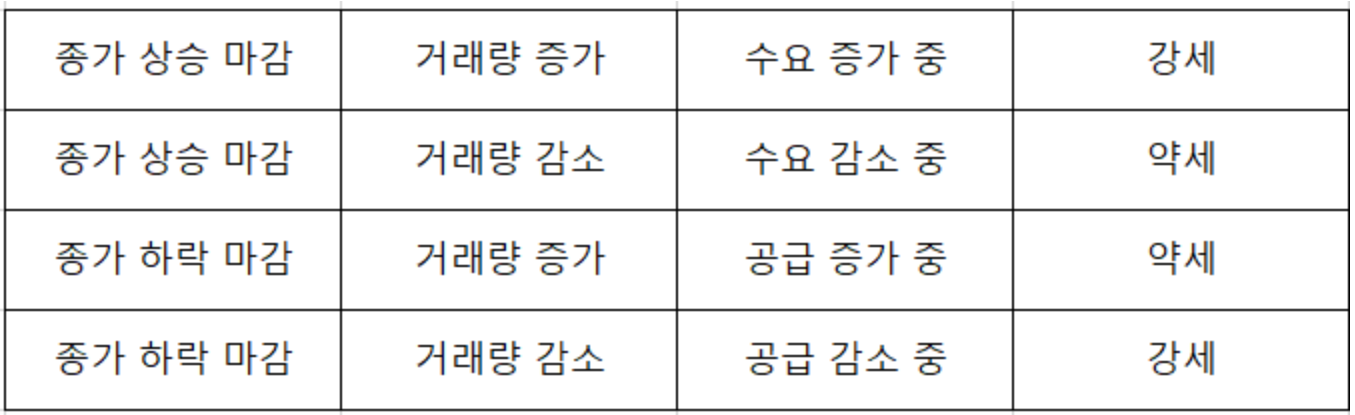

In [ ]:
def get_demand_status(x):
    open, close, volume_change = x['Open'], x['Close'], x['Volume_Change']
    result1, result2 = '', ''
    close_change = close - open
    if close_change > 0 and volume_change > 0:
        result1 = '수요 증가 중'
        result2 = '강세'
    elif close_change > 0 and volume_change <= 0:
        result1 = '수요 감소 중'
        result2 = '약세'
    elif close_change <= 0 and volume_change > 0:
        result1 = '공급 증가 중'
        result2 = '약세'
    elif close_change <= 0 and volume_change <= 0:
        result1 = '공급 감소 중'
        result2 = '강세'
    return result1, result2

In [ ]:
df['demand'], df['strength'] = zip(*df.apply(get_demand_status, axis=1))
df_june = df[(df.index.year == 2024) & (df.index.month >= 5)].copy()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1)
fig.set_size_inches(20,5)

ylim_min = round(df['Close'].min()*0.9, -1)
ylim_max = round(df['Close'].max()*1.1, -1)

plt.subplot(1, 1, 1)
sns.barplot(x= df.index, y = df['Close'], hue = df['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

fig, ax = plt.subplots(nrows = 2, ncols=2)
fig.set_size_inches(20,14)

ylim_min = round(df_june['Close'].min()*0.9, -1)
ylim_max = round(df_june['Close'].max()*1.1, -1)

plt.subplot(2, 2, 1)
sns.barplot(x= df_june.index, y = df_june['Close'], hue = df_june['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

plt.subplot(2, 2, 2)
sns.barplot(x= df_june.index, y = df_june['Close'], hue = df_june['demand']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

plt.subplot(2, 2, 3)
sns.barplot(x= df_june.index, y = df_june['Volume'], hue = df_june['strength'])
plt.xticks(rotation = 90)

plt.subplot(2, 2, 4)
sns.barplot(x= df_june.index, y = df_june['Weight'], hue = df_june['strength'])
plt.xticks(rotation = 90)
plt.show()